<a href="https://colab.research.google.com/github/NathanielCogneaux/NLP-comparison-between-Naive-Bayes-RNN-LSTM-and-Transformers/blob/main/Transformers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# !pip install pyLDAvis
!pip install datasets
!pip install matplotlib
!pip install nltk
!pip install wordcloud
!pip install accelerate -U

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 290.1/290.1 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 37.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 45.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 52.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━

In [ ]:
# import the Sentiment Analysis for Financial News DataSet: FinancialPhraseBank (Available on Hugging Face)

# https://huggingface.co/datasets/financial_phrasebank
# 0 is negative
# 1 is positive
# 2 is neutral
from datasets import load_dataset

dataset = load_dataset("financial_phrasebank", "sentences_allagree")

Generating train split:   0%|          | 0/2264 [00:00<?, ? examples/s]

Text(0.5, 1.0, 'Distribution of the data among the labels')

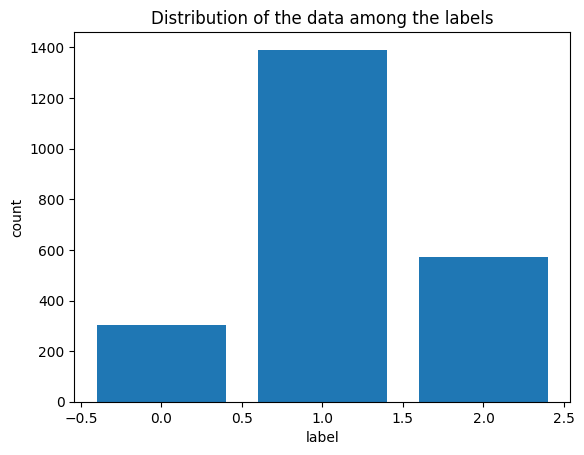

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.DataFrame(dataset["train"])

df_distrib = df["label"].value_counts()
plt.bar(df_distrib.index, df_distrib.values)
plt.xlabel("label")
plt.ylabel("count")
plt.title("Distribution of the data among the labels")

(-0.5, 399.5, 199.5, -0.5)

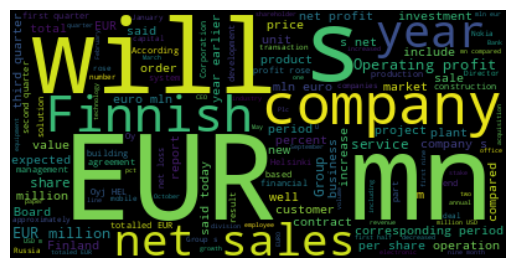

In [ ]:
from wordcloud import WordCloud

text = " ".join(dataset["train"]["sentence"])

wordcloud = WordCloud().generate(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

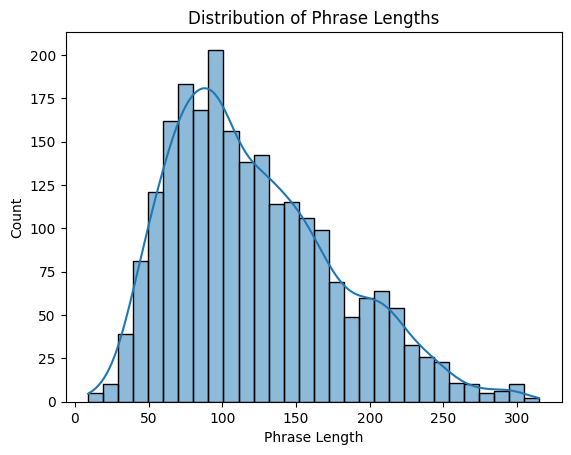

In [ ]:
import seaborn as sns

phrase_length = pd.DataFrame(data=dataset["train"]).apply(lambda x : len(x["sentence"]), axis=1)
sns.histplot(phrase_length, bins=30, kde=True)
plt.title('Distribution of Phrase Lengths')
plt.xlabel('Phrase Length')
plt.show()

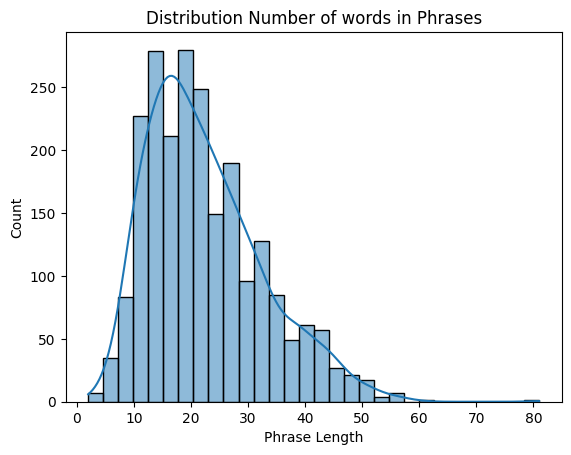

In [ ]:
number_words = pd.DataFrame(data=dataset["train"]).apply(lambda x : len(x["sentence"].split(" ")), axis=1)
sns.histplot(number_words, bins=30, kde=True)
plt.title('Distribution Number of words in Phrases')
plt.xlabel('Phrase Length')
plt.show()

In [ ]:
# import gensim

# import pyLDAvis.gensim_models as gensimvis
# import pyLDAvis

# documents = [sample['sentence'] for sample in dataset['train']]

# # Prétraitement des documents : tokenization, suppression des stopwords et création du corpus
# stop_words = set(stopwords.words('english'))
# texts = []

# for document in documents:
#     tokens = word_tokenize(document.lower())  # Tokenization et mise en minuscules
#     filtered_tokens = [word for word in tokens if word.isalnum() and word not in stop_words]  # Suppression des stopwords et de la ponctuation
#     texts.append(filtered_tokens)

# # Création du modèle LDA avec Gensim
# dictionary = gensim.corpora.Dictionary(texts)
# corpus = [dictionary.doc2bow(text) for text in texts]
# lda_model = gensim.models.LdaModel(corpus, num_topics=3, id2word=dictionary, passes=15)

# # Visualisation avec pyLDAvis
# pyLDAvis.enable_notebook()
# lda_vis_data = gensimvis.prepare(lda_model, corpus, dictionary)
# pyLDAvis.display(lda_vis_data)

In [ ]:
# data prepocessing
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import re

nltk.download('wordnet')

en_stopwords = set(stopwords.words("english"))

def preporcessing(sentence):
  sentence = sentence.lower() # Remove caps
  sentence = re.sub(r"[^a-z\s]", "", sentence) # Remove everything that is not a letter or a space !! Removing numbers and % (assumption: words are enough to classify)

  # Remove stop words
  sentence = word_tokenize(sentence)
  sentence = [word for word in sentence if word not in en_stopwords]

  # lemmatization
  sentence = [WordNetLemmatizer().lemmatize(word) for word in sentence]

  return " ".join(sentence)


for i in range(len(df["sentence"])):
  df["sentence"][i] = preporcessing(df["sentence"][i])

df.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
<ipython-input-10-aa2c612e92c2>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["sentence"][i] = preporcessing(df["sentence"][i])


,sentence,label
0,according gran company plan move production ru...,1
1,last quarter componenta net sale doubled eurm ...,2
2,third quarter net sale increased eur mn operat...,2
3,operating profit rose eur mn eur mn correspond...,2
4,operating profit totalled eur mn eur mn repres...,2


In [ ]:
# Our model

from sklearn.metrics import accuracy_score
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

def tokenize(dataset):
  return BertTokenizer(dataset["sentence"])

new_dataset = dataset.map(tokenize, batched = True)["train"].shuffle()

length = len(new_dataset)

train, test = new_dataset.select(range(int(0.8*length))), new_dataset.select(range(int(0.8*length), length))


model = BertForSequenceClassification()
training_args = None

trainer = Trainer(
    model = model,
    args = training_args,
    train_dataset = train,
    eval_dataset = test,
    compute_metrics = accuracy_score,
)

trainer.train()
trainer.eval()

Map:   0%|          | 0/2264 [00:00<?, ? examples/s]

TypeError: stat: path should be string, bytes, os.PathLike or integer, not list

In [ ]:
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments
from datasets import Dataset, load_dataset


tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

def tokenize(dataset):
    return tokenizer(dataset['sentence'])


# Tokenizing the dataset
tokenized_dataset = dataset.map(tokenize, batched=True)
train_dataset = tokenized_dataset['train'].shuffle(seed=seed).select(range(int(0.8 * len(tokenized_dataset['train']))))
test_dataset = tokenized_dataset['train'].shuffle(seed=seed).select(range(int(0.8 * len(tokenized_dataset['train'])), len(tokenized_dataset['train'])))

model = BertForSequenceClassification.from_pretrained('bert-base-uncased')

training_args = TrainingArguments(
    output_dir='./results',          # Output directory for model checkpoints
    num_train_epochs=3,              # Total number of training epochs
    per_device_train_batch_size=8,   # Batch size for training
    per_device_eval_batch_size=8,    # Batch size for evaluation
    warmup_steps=500,                # Number of warmup steps for learning rate scheduler
    weight_decay=0.01,               # Strength of weight decay
    logging_dir='./logs',            # Directory for storing logs
    logging_steps=10,
)

def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    # Calculate accuracy using preds and labels
    accuracy = (preds == labels).mean()
    return {"accuracy": accuracy}

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    compute_metrics=compute_metrics,
)

trainer.train()
evaluation_results = trainer.evaluate()
